In [65]:
# %%
# Alumno: Menodoza Benito Sergio
# Carrera: Ingenieria de Sistemas
# Grupo laboratorio: 7
# Materia: sis420


# A partir del dataset descargado de www.kaggle.com utilizar el cuadernillo que se adjunta, 
# el cual se reviso en clase, para lograr calcular los valores de theta de acuerdo a las variables x que
# contenga su dataset elegido. El trabajo debe concluir con predicciones de valores que permitan demostrar que los pesos 
# (theta) son los mejores que ha podido identificar.




# Predicción de masa corporal en pacientes con diabetes, hipertencion o accidentes cerebrobasculares
# Acerca del conjunto de datos
# Este es un conjunto de datos limpio de más de 70,692 respuestas a la encuesta BRFSS2015 de los CDC. 
# Hay 18 variables características y 3 variables objetivo, Diabetes, Hipertensión y Accidente cerebrovascular,
# cada variable objetivo tiene 2 clases. Este conjunto de datos está equilibrado.

# Datos:

# Age, <----- Y
# Sex,
# HighChol, <------- X
# CholCheck,
# BMI, 
# Smoker,
# HeartDiseaseorAttack,
# PhysActivity,
# Fruits,
# Veggies,
# HvyAlcoholConsump,
# GenHlth,
# MentHlth,
# PhysHlth,
# DiffWalk,

# Diabetes,
# Hypertension,
# Stroke


# Ejercicio de programación Regresión Lineal

In [66]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [67]:
# Leer datos separados por una coma
data = data = np.loadtxt( os.path.join("health_data.csv"), skiprows=1, delimiter = ',')

X, y = data[:, 0], data[:, 2]
m = y.size  # m = numero de ejemplos de entrenamiento

In [68]:
print(X)
print(y)
print(m)

[ 4. 12. 13. ... 13. 11.  9.]
[0. 1. 0. ... 1. 1. 1.]
70692


### 1.1 Trazar los datos

In [69]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('masa corporal')
    pyplot.xlabel('edad')


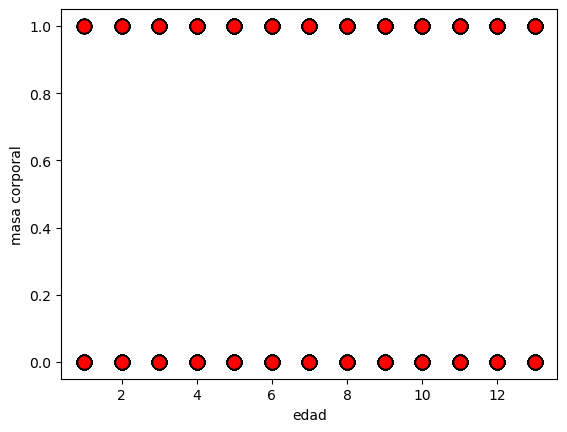

In [70]:
plotData(X, y)

In [71]:
pyplot.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [72]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [73]:
print(X)

[[ 1.  4.]
 [ 1. 12.]
 [ 1. 13.]
 ...
 [ 1. 13.]
 [ 1. 11.]
 [ 1.  9.]]


<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [74]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [75]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 0.26
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 138.05
Valor de costo esperado (aproximadamente)  54.24


In [76]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [77]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 15000
alpha = 0.003

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print(J_history[-1])
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

0.11746865589631726
Theta encontrada por descenso gradiente: 0.1626, 0.0423
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

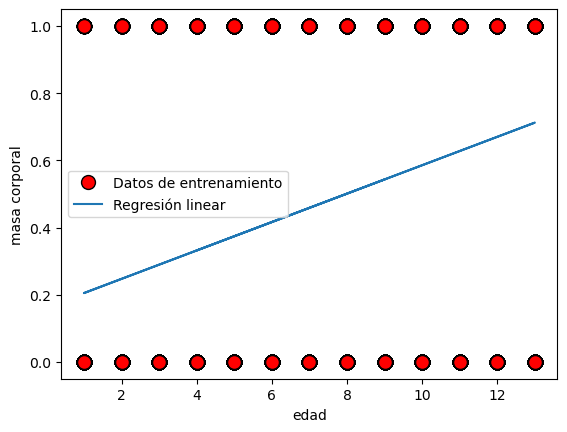

In [78]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [79]:
# predecir probabilidad de tener colesterol alto en pacientes entre 60-64: 
# Age (1 = 18-24, 9 = 60-64, 13 = 80 o más)


predict1 = np.dot([1, 9], theta)
print('La probabilidad de colesterol alto para pacientes entre 60-64 es de '+ str(predict1*100)+" %")

predict2 = np.dot([1, 1], theta)
print('La probabilidad de colesterol alto para pacientes entre 18-24 es de '+ str(predict2*100)+" %")

La probabilidad de colesterol alto para pacientes entre 60-64 es de 54.31013666032191 %
La probabilidad de colesterol alto para pacientes entre 18-24 es de 20.489117841414576 %


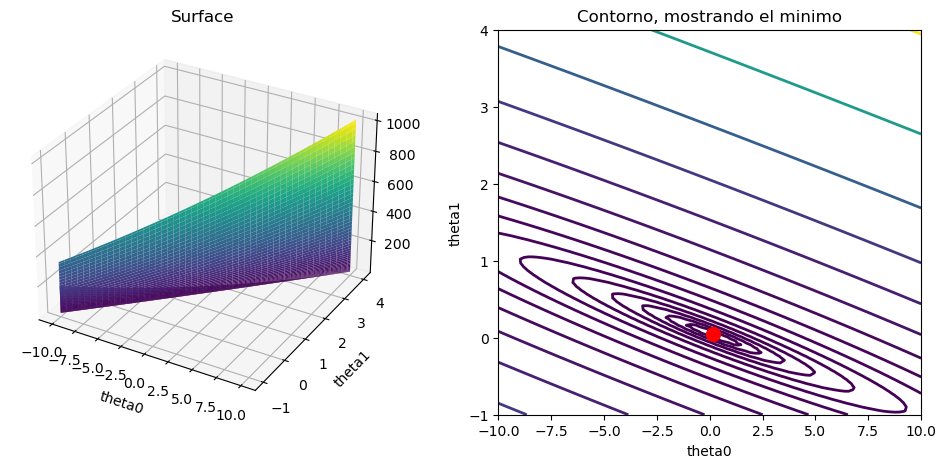

In [80]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Debido a la forma en que funcionan las cuadrículas en el comando surf, 
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')
pass